<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/cfpd_consumer_complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-06-24

In [36]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

**Data Source**  
https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data   

In [4]:
# CAUTION: this dataset is 719 MB in size.

# this doesn't work for this large file (seems that it would work for file under 50 MB)
# url = "https://drive.google.com/uc?id=1giGHkApdv3ehRI7uw4LoLhGT6rN_uR0r"

# this works
# url = "https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD"
# df = pd.read_csv(url)

# this works
path = "/content/drive/My Drive/data/cfpd_consumer_complaints/Consumer_Complaints.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df.shape) # (1315204, 18)
df.head(2)

(1315085, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/22/2019,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Sued you without properly notifying you of law...,NaN,NaN,Nationwide Recovery Group LLC,OR,971XX,NaN,NaN,Web,06/22/2019,Closed with monetary relief,Yes,NaN,3283266
1,06/21/2019,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",IL,605XX,NaN,NaN,Web,06/21/2019,In progress,Yes,NaN,3282738


In [6]:
# check NAs count and percentage for each column
nas = np.array(df.isna().sum())
pd.DataFrame([df.columns, nas, nas/df.shape[0] * 100]).T

,0,1,2
0,Date received,0,0
1,Product,0,0
2,Sub-product,235166,17.8822
3,Issue,0,0
4,Sub-issue,535176,40.6952
5,Consumer complaint narrative,925226,70.3548
6,Company public response,848541,64.5237
7,Company,0,0
8,State,20559,1.56332
9,ZIP code,119826,9.11165


In [7]:
df['datereceived'] = pd.to_datetime(df['Date received'], 
                                    format="%m/%d/%Y")
df['datesent'] = pd.to_datetime(df['Date sent to company'],
                                format="%m/%d/%Y")
df[['datereceived', 'datesent']].sample(4)

,datereceived,datesent
615079,2017-01-09,2017-01-09
1034510,2014-08-14,2014-10-08
11836,2019-05-29,2019-05-29
983992,2014-12-17,2014-12-18


In [8]:
# describe non-numeric columns
df.describe(exclude=np.number)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,datereceived,datesent
count,1315085,1315085,1079919,1315085,779909,389859,466544,1315085,1294526,1195259,179965,710315,1315085,1315085,1315078,1315085,768501,1315085,1315085
unique,2760,18,76,167,218,372832,10,5321,63,22769,3,4,6,2709,8,2,2,2760,2709
top,09/08/2017,Mortgage,Credit reporting,Incorrect information on your report,Information belongs to someone else,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",CA,300XX,Servicemember,Consent provided,Web,09/08/2017,Closed with explanation,Yes,No,2017-09-08 00:00:00,2017-09-08 00:00:00
freq,3553,280698,237652,144799,65707,993,327095,120371,180075,7600,87235,390181,972343,3387,1019300,1282414,620123,3553,3387
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01 00:00:00,2011-12-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-22 00:00:00,2019-06-22 00:00:00


In [326]:
# total row count = 1315204
len(df['Complaint ID'].unique())

1315085

time period (days): 2760


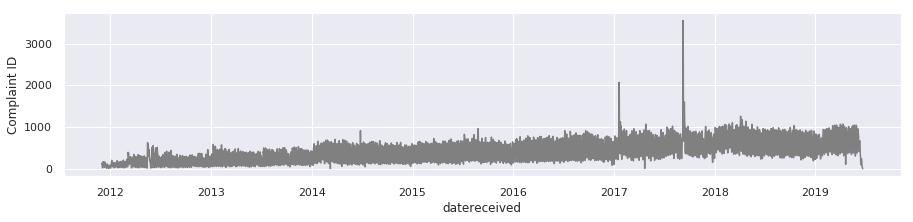

In [502]:
# complaint distribution

print("time period (days):",
      (df['datereceived'].max() - 
       df['datereceived'].min()).days)

df_dates = (df.groupby(by='datereceived', as_index=False)
              .agg({'Complaint ID': pd.Series.nunique})
          )

sns.set()
fig, ax = plt.subplots(1,1, figsize=(15,3))
sns.lineplot(x='datereceived', y='Complaint ID', 
             data=df_date,
             color='gray',
             ci=None,
             err_style="band"
            );

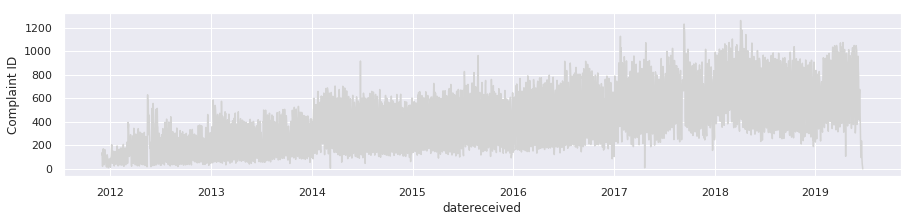

In [503]:
# remove outliers
df_dates = df_dates[(np.abs(stats.zscore(df_dates['Complaint ID']))<3)]
sns.set()
fig, ax = plt.subplots(1,1, figsize=(15,3))
sns.lineplot(x='datereceived', y='Complaint ID', 
             data=df_dates,
             color='lightgray',
             ci=None,
             err_style="band"
            );

In [504]:
df_dates.set_index('datereceived', inplace=True)
df_dates.head(2)

,Complaint ID
datereceived,
2011-12-01,120
2011-12-02,138


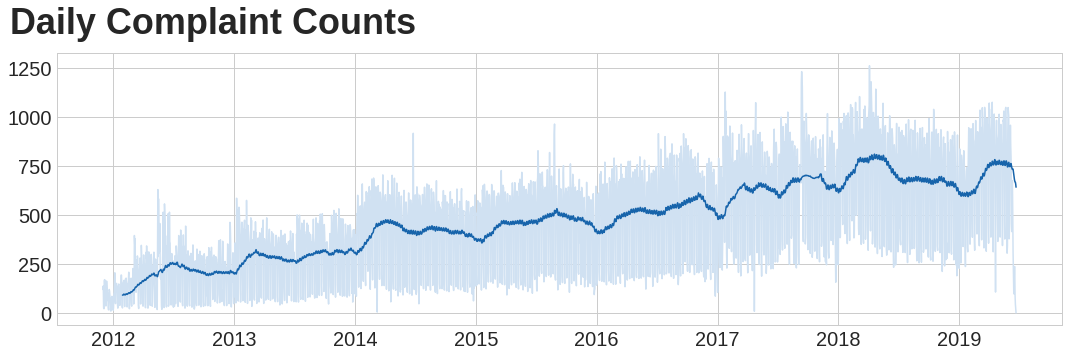

In [506]:
# timeseries plot with rolling mean

# plt.style.use('seaborn-whitegrid')
colors=cm.Blues(np.linspace(0.2,0.8,5))
fig, ax = plt.subplots(1,1, figsize=(18,5))

plt.plot(df_dates, color=colors[0]);
plt.plot(df_dates.rolling(60).mean(),
         color=colors[4]
        )

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

plt.title(label="Daily Complaint Counts",
          x=0.155, y=1.05,
          fontsize=36, fontweight='bold'
         );
str="Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/"
# plt.text(s='s', x=40, y=40,
#          fontsize=8, color='gray'
#         );

https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a  

In [508]:
df_means = df_dates.rolling(60).mean().reset_index()
df_means.head(2)

,datereceived,Complaint ID
0,2011-12-01,NaN
1,2011-12-02,NaN


In [0]:
df_means.rename(columns={'datereceived': 'ds', 
                         'Complaint ID': 'y'},
               inplace=True)

In [528]:
# The Facebook Prophet package was released in 2017 for Python
# and R, and data scientists around the world rejoiced. 
# Prophet is designed for analyzing time series with daily 
# observations that display patterns on different time scales. 
# It also has advanced capabilities for modeling the effects 
# of holidays on a time-series and implementing custom 
# changepoints, but we will stick to the basic functions 
# to get a model up and running. Prophet, like quandl, can 
# be installed with pip from the command line.

import fbprophet

# Make the prophet model and fit on the data
model = fbprophet.Prophet(changepoint_prior_scale=0.5)
model.fit(df_means)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# make 2 years prediction
df_future = model.make_future_dataframe(periods=365*2, 
                                        freq='D')
forecast = model.predict(df_future)

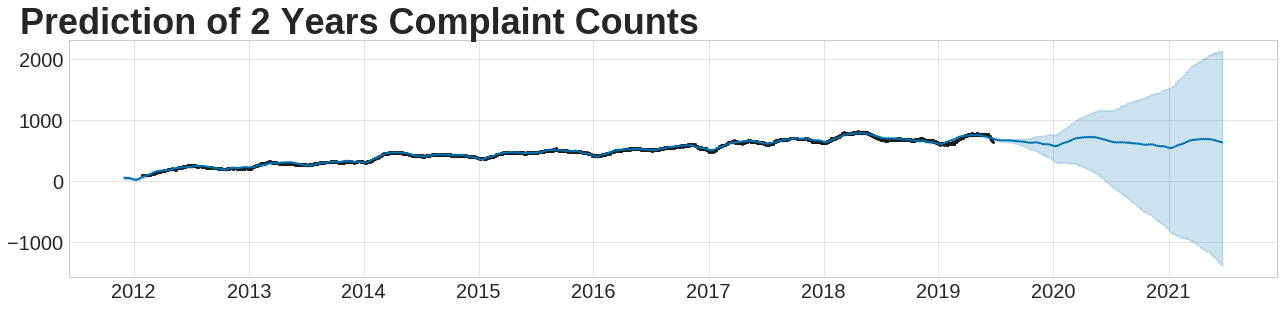

In [534]:
fig, ax = plt.subplots(1,1, figsize=(18,4))
model.plot(forecast, xlabel='', ylabel='', ax=ax)
plt.title('Prediction of 2 Years Complaint Counts',
          x=0.24, y=1.07,
          fontsize=36, fontweight='bold'
         );

**Dataset Descrpitons**  
https://files.consumerfinance.gov/f/documents/201704_cfpb_Summary_of_Product_and_Sub-product_Changes.pdf   
https://files.consumerfinance.gov/f/documents/201704_cfpb_Consumer_Complaint_Form_Product_and_Issue_Options.pdf  

In [10]:
# check product, 18 products
# because of the changes in product names, 
df['Product'].value_counts()

Mortgage                                                                        280698
Debt collection                                                                 250476
Credit reporting, credit repair services, or other personal consumer reports    242240
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     52430
Credit card or prepaid card                                                      50655
Checking or savings account                                                      43438
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            12032
Money transfer, virtual currency, or money 

**Deloitte Report**  
https://www2.deloitte.com/content/dam/Deloitte/us/Documents/regulatory/us-aers-the-power-of-complaints-042115.pdf  
<img src="https://drive.google.com/uc?id=1sD2JEFoJOV0G6n-wdLK0lmUE0roMW7uC" width="500">

In [11]:
# check products from Jul 21, 2011 to June 30 ,2014
# 1. data before Dec 2011 is missing in the dataset
# 2. percentages are different from the chart above
#    maybe used different aggregation of products

condition = ((df['datereceived']>datetime(2011, 7, 21)) &
             (df['datereceived']<datetime(2014, 6, 30))
            )
total_counts = df[condition]['Product'].shape[0]
df1 = df[condition]['Product'].value_counts().reset_index()
df1['percentage'] = df1['Product'] / total_counts
print('total counts:', total_counts)
print('total percentage:', df1['percentage'].sum())
df1

total counts: 260733
total percentage: 1.0


,index,Product,percentage
0,Mortgage,111197,0.426478
1,Credit card,36826,0.141240
2,Bank account or service,33019,0.126639
3,Debt collection,31442,0.120591
4,Credit reporting,30938,0.118658
5,Student loan,8001,0.030687
6,Consumer Loan,7206,0.027637
7,Money transfers,1173,0.004499
8,Payday loan,931,0.003571


**How to draw pie charts**  
https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f  
**Choosing Colormaps**  
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html  
**Pie chart labels**  
https://matplotlib.org/3.1.0/gallery/pie_and_polar_charts/pie_and_donut_labels.html  

In [95]:
from matplotlib.pyplot import cm
colors=cm.rainbow(np.linspace(0,1,len(df1)))
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.49019608e-01 3.84105749e-01 9.80634770e-01 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [2.52941176e-01 9.25637660e-01 8.30184031e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [7.54901961e-01 9.20905518e-01 5.52364973e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 3.72701992e-01 1.89801093e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


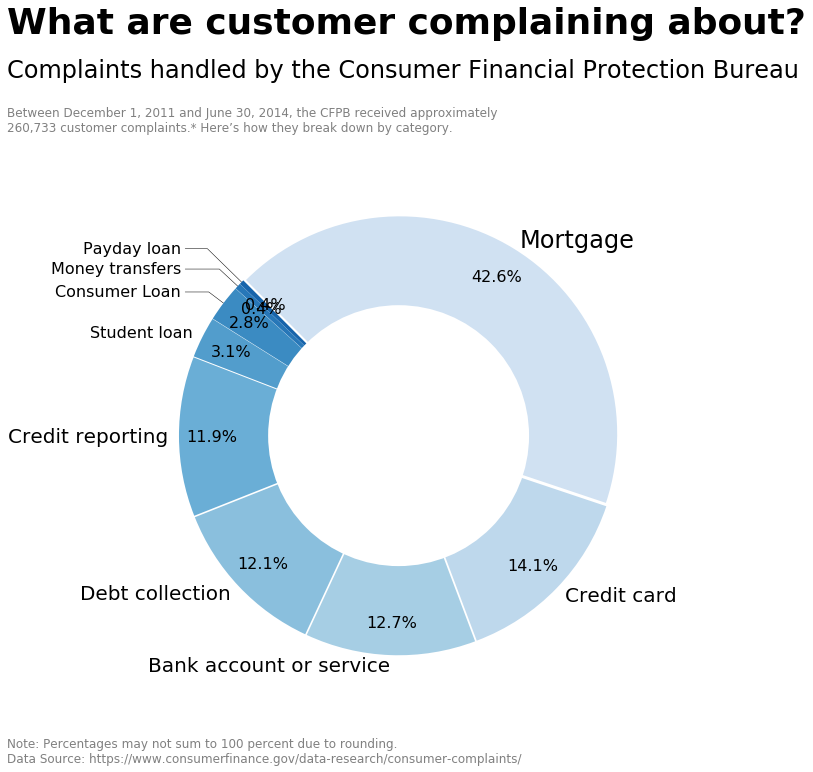

In [288]:
# draw a pie chart first lol

plt.rcParams['font.size'] = 16
colors=cm.Blues(np.linspace(0.2,0.8,len(df1)))
fig, ax = plt.subplots(figsize=(20, 10), 
                       subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts= (
  ax.pie(df1['Product'], 
         colors=colors,
         labels=df1['index'].to_list()[:-3]+['']*3, 
         labeldistance=1.05,
         autopct='%1.1f%%', 
         startangle=135, 
         pctdistance=0.85, 
         explode = [0.01]*len(df1),
         counterclock=False,
))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf() # get the current figure
fig.gca().add_artist(centre_circle);

texts[0].set_fontsize(24)
for i in range(1,5):
  texts[i].set_fontsize(20)

# bbox_props = dict(boxstyle="square,pad=0.3", 
#                   fc="w", ec="k", lw=1.1
#                  )
kw = dict(arrowprops=dict(arrowstyle="-",
                          color='k'
                         ),
#           bbox=bbox_props, 
          zorder=0, 
          va="center")
for i, p in enumerate(wedges):
  if i > len(df1)-4:
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 
                           1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": 
                             connectionstyle})
    ax.annotate(df1['index'][i], xy=(x, y), 
                xytext=(np.sign(x), 0.2*y+0.09*i),
                horizontalalignment=horizontalalignment, 
                **kw) 
    
plt.text(s="What are customer complaining about?",
         x=-1.8, y=1.85,
         fontsize=36, fontweight='bold'
         )
plt.text(s="Complaints handled by the Consumer Financial Protection Bureau",
         x=-1.8, y=1.65,
         fontsize=24
        )
str=("Between December 1, 2011 and June 30, 2014, the CFPB received approximately\n"+
     "260,733 customer complaints.* Here’s how they break down by category.")
plt.text(s=str, x=-1.8, y=1.4,
         fontsize=12, color='gray'
        );
str=("Note: Percentages may not sum to 100 percent due to rounding.\n"+
     "Data Source: https://www.consumerfinance.gov/data-research/consumer-complaints/")
plt.text(s=str, x=-1.8, y=-1.5,
         fontsize=12, color='gray'
        );

In [12]:
# check sub-products from Jul 21, 2011 to June 30 ,2014

total_counts = df[condition]['Sub-product'].shape[0]
df2 = df[condition]['Sub-product'].value_counts().reset_index()
df2['percentage'] = df2['Sub-product'] / total_counts
print('total counts:', total_counts)
print('total percentage:', df2['percentage'].sum())
df2

total counts: 260733
total percentage: 0.7365312407712102


,index,Sub-product,percentage
0,Other mortgage,49951,0.191579
1,Conventional fixed mortgage,32041,0.122888
2,Checking account,25095,0.096248
3,Conventional adjustable mortgage (ARM),11890,0.045602
4,FHA mortgage,9650,0.037011
5,Non-federal student loan,8826,0.033851
6,"Other (i.e. phone, health club, etc.)",8789,0.033709
7,Credit card,7028,0.026955
8,I do not know,6707,0.025724
9,Vehicle loan,4734,0.018157


In [35]:
# check product/sub-products from Jul 21, 2011 
# to June 30 ,2014

(df[condition]
   .fillna('-')
   .groupby(by=['Product', 'Sub-product'], as_index=False)
   .agg({'Complaint ID': pd.Series.nunique})
   .sort_values(by=['Product', 'Complaint ID'], 
                ascending=(True, False))
)

# we can see that for prodcuts such as "Credit card", 
# "Credit Reporting", "Payday Loan", there are not
# sub-products

,Product,Sub-product,Complaint ID
2,Bank account or service,Checking account,25095
3,Bank account or service,Other bank product/service,3707
4,Bank account or service,Savings account,2212
0,Bank account or service,(CD) Certificate of deposit,1763
1,Bank account or service,Cashing a check without an account,242
8,Consumer Loan,Vehicle loan,4734
6,Consumer Loan,Personal line of credit,1001
5,Consumer Loan,Installment loan,950
7,Consumer Loan,Vehicle lease,521
9,Credit card,-,36826
